In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import shapely.wkt
from shapely.geometry import Point, Polygon, MultiPolygon

year = '2006'
file311 = "/content/gdrive/MyDrive/Dataset/311_06.csv"
fileCrime = "/content/gdrive/MyDrive/Dataset/CrimeData.csv"
fileRegions = "/content/gdrive/MyDrive/Dataset/Regions.csv"

data311 = pd.read_csv(file311,low_memory=False)
relevantColumns311 = ['Created Date','Latitude','Longitude','Complaint Type']
relevantComplaints311 = ['Blocked Driveway','Building/Use','Noise','Safety']
finalColumns311 = ['Created Date','Complaint Type','Precincts']
data311 = data311[relevantColumns311]
data311 = data311.loc[(data311['Complaint Type'] == 'Blocked Driveway') | (data311['Complaint Type'] == 'Building/Use') | (data311['Complaint Type'] == 'Noise') | (data311['Complaint Type'] == 'Safety')]
print('Anomalies preprocessed!!!')

crimeData = pd.read_csv(fileCrime, low_memory=False)
relevantColumnsCR = ['CMPLNT_TO_DT','CMPLNT_TO_TM','CMPLNT_FR_DT','RPT_DT','Lat_Lon','Latitude','Longitude','OFNS_DESC']
finalColumnsCR = ['Date','OFNS_DESC','CMPLNT_TO_TM','Longitude','Latitude','Precincts']
relevantCrimesCR = ['ROBBERY', 'BURGLARY', 'FELONY ASSAULT','GRAND LARCENY']
locations = pd.read_csv("/content/gdrive/MyDrive/Dataset/Regions.csv", low_memory=False)
crime2006 = crimeData.loc[crimeData['RPT_DT'].str.endswith(year)]
crime2006 = crime2006[relevantColumnsCR]
crime2006 = crime2006.loc[(crime2006['OFNS_DESC'] == 'ROBBERY') | (crime2006['OFNS_DESC'] == 'BURGLARY') | (crime2006['OFNS_DESC'] == 'FELONY ASSAULT') | (crime2006['OFNS_DESC'] == 'GRAND LARCENY')]
print('Crime Preprocessed!!!')

locations = pd.read_csv(fileRegions, low_memory=False)
precincts = {}
for index, row in locations.iterrows():
  precincts[row['Precinct']] = shapely.wkt.loads(row['the_geom'])

print('Locations loaded!!!')

Anomalies preprocessed!!!
Crime Preprocessed!!!
Locations loaded!!!


In [ ]:
pos = 0
prec = np.ndarray((data311.shape[0],))

for index,row in data311.iterrows():

  poo = Point(row['Longitude'],row['Latitude'])  
  for key,val in precincts.items():
    if poo.within(val):
      prec[pos] = key
      break

  pos=pos+1
  if(pos%1000 == 0):
    print ("processed "+str(pos)+" records!!")
data311['Precincts'] = prec.astype(int)
print("Done!!")
data311['Precincts'] = data311['Precincts'].astype(np.int64)
data311 = data311[data311['Precincts'] >= 0]
data311 = data311[finalColumns311]

print('Anomaly Preprocessing complete!!!')

processed 1000 records!!
processed 2000 records!!
processed 3000 records!!
processed 4000 records!!
processed 5000 records!!
processed 6000 records!!
processed 7000 records!!
processed 8000 records!!
processed 9000 records!!
processed 10000 records!!
processed 11000 records!!
processed 12000 records!!
processed 13000 records!!
processed 14000 records!!
processed 15000 records!!
processed 16000 records!!
processed 17000 records!!
processed 18000 records!!
processed 19000 records!!
processed 20000 records!!
processed 21000 records!!
processed 22000 records!!
processed 23000 records!!
processed 24000 records!!
processed 25000 records!!
processed 26000 records!!
processed 27000 records!!
processed 28000 records!!
processed 29000 records!!
processed 30000 records!!
processed 31000 records!!
processed 32000 records!!
processed 33000 records!!
processed 34000 records!!
processed 35000 records!!
processed 36000 records!!
processed 37000 records!!
processed 38000 records!!
processed 39000 recor

In [ ]:
pos = 0
prec = np.ndarray((crime2006.shape[0],))
date = np.ndarray((crime2006.shape[0],)).astype(str)

for index,row in crime2006.iterrows():
  
  if not(str(row['CMPLNT_FR_DT']) == 'nan'):
    date[pos] = row['CMPLNT_FR_DT']
  elif not(str(row['CMPLNT_TO_DT']) == 'nan'):
    date[pos] = row['CMPLNT_TO_DT']
  else:
    date[pos] = row['RPT_DT']
  
  poo = Point(row['Longitude'],row['Latitude'])  
  for key,val in precincts.items():
    if poo.within(val):
      prec[pos] = key
      break

  pos=pos+1
  if(pos%1000 == 0):
    print ("processed "+str(pos)+" records!!")

crime2006['Precincts'] = prec.astype(int)
crime2006['Date'] = date
crime2006 = crime2006[crime2006['Precincts'] >= 0]

print("Done!!")

crime2006 = crime2006[finalColumnsCR]
crime2006.sort_values(['Precincts','Date','OFNS_DESC'],ascending=[True,True,True],inplace=True)
crime2006 = crime2006[crime2006['Date'].str.contains(year)]
crime2006['Precincts'] = crime2006['Precincts'].astype(np.int64)

print('Crime Preprocessing complete!!!')

processed 1000 records!!
processed 2000 records!!
processed 3000 records!!
processed 4000 records!!
processed 5000 records!!
processed 6000 records!!
processed 7000 records!!
processed 8000 records!!
processed 9000 records!!
processed 10000 records!!
processed 11000 records!!
processed 12000 records!!
processed 13000 records!!
processed 14000 records!!
processed 15000 records!!
processed 16000 records!!
processed 17000 records!!
processed 18000 records!!
processed 19000 records!!
processed 20000 records!!
processed 21000 records!!
processed 22000 records!!
processed 23000 records!!
processed 24000 records!!
processed 25000 records!!
processed 26000 records!!
processed 27000 records!!
processed 28000 records!!
processed 29000 records!!
processed 30000 records!!
processed 31000 records!!
processed 32000 records!!
processed 33000 records!!
processed 34000 records!!
processed 35000 records!!
processed 36000 records!!
processed 37000 records!!
processed 38000 records!!
processed 39000 recor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
daterange = pd.date_range(start='01/01/'+year,end='12/31/'+year)
daterange = daterange.strftime('%m/%d/%Y')
daterange = daterange.tolist()

inv_dict = {}
for i in range(len(daterange)):
  inv_dict[daterange[i]] = i

inv_complaints = {}
for i in range(len(relevantComplaints311)):
  inv_complaints[relevantComplaints311[i]] = i

n_precincts = data311['Precincts'].nunique()
uniq_precincts = data311['Precincts'].unique()
inv_prec = {}
for i in range(n_precincts):
  inv_prec[uniq_precincts[i]] = i

inv_crimes = {}
for i in range(len(relevantCrimesCR)):
  inv_crimes[relevantCrimesCR[i]] = i

In [ ]:
matricesCR = [np.zeros((n_precincts,4),dtype=np.int64) for x in range(365)]
exceptions = 0

for idx, row in crime2006.iterrows():
  try:
    id1 = inv_prec[row['Precincts']]
    id2 = inv_dict[row['Date']]
    id3 = inv_crimes[row['OFNS_DESC']]
    matricesCR[id2][id1][id3] = matricesCR[id2][id1][id3] + 1
  except:
    print("Exception!!!")
    print("Precincts",id1)
    print("Date",id2)
    print("Offense",id3)
    exceptions = exceptions + 1

print ('Created crime matrices!!!')


matrices311 = [np.zeros((n_precincts,4),dtype=np.int64) for x in range(365)]
exceptions = 0

for idx, row in data311.iterrows():
  try:
    id1 = inv_prec[row['Precincts']]
    id2 = inv_dict[str(row['Created Date']).split()[0]]
    id3 = inv_complaints[row['Complaint Type']]
    matrices311[id2][id1][id3] = matrices311[id2][id1][id3] + 1
  except:
    print("Exception!!!")
    print("Precincts",id1)
    print("Date",id2)
    print("Offense",id3)
    exceptions = exceptions + 1

print('Created anomaly matrices!!!')

Created crime matrices!!!
Created anomaly matrices!!!


In [ ]:
import pickle
output311 = 'matrices311'
outputCrime = 'matricesCR'

file311 = open(output311,'wb')
pickle.dump(matrices311,file311)
fileCR = open(outputCrime,'wb')
pickle.dump(matricesCR,fileCR)

In [ ]:
import pandas as pd
import numpy as np
import shapely.wkt
from shapely.geometry import Point, Polygon, MultiPolygon
import re

filePOI = '/content/gdrive/MyDrive/Dataset/Point_Of_Interest.csv'
fileRegions = "/content/gdrive/MyDrive/Dataset/Regions.csv"

poi = pd.read_csv(filePOI,low_memory=False)
locations = pd.read_csv(fileRegions, low_memory=False)

relevantColumns = ['the_geom','CREATED','FACILITY_T']
finalColumns = ['Precincts','FACILITY_T']
poi = poi[relevantColumns]
precincts = {}
for index, row in locations.iterrows():
  precincts[row['Precinct']] = shapely.wkt.loads(row['the_geom'])

In [ ]:
lat = []
longt = []
date = []

for idx,row in poi.iterrows():
  location = re.split(r' |\)|\(' ,row['the_geom'])
  year = int(row['CREATED'].split()[0].split('/')[-1])
  lat = lat + [location[-2]]
  longt = longt + [location[2]]
  date = date + [year]

poi['Year'] = date
poi['Latitude'] = lat
poi['Longitude'] = longt
pos = 0
prec = np.ndarray((poi.shape[0],))

for index,row in poi.iterrows():

  poo = Point(float(row['Longitude']),float(row['Latitude']))  
  for key,val in precincts.items():
    if poo.within(val):
      prec[pos] = key
      break

  pos=pos+1
  if(pos%1000 == 0):
    print ("processed "+str(pos)+" records!!")
    
poi['Precincts'] = prec.astype(int)
print("Done!!")

poi['Precincts'] = poi['Precincts'].astype(np.int64)
poi = poi[poi['Precincts'] >= 0]
inv_categories = {}
n_categories = poi['FACILITY_T'].nunique()
uniq_categories = poi['FACILITY_T'].unique()
for i in range(n_categories):
  inv_categories[uniq_categories[i]] = i

n_precincts = poi['Precincts'].nunique()
uniq_precincts = poi['Precincts'].unique()
inv_prec = {}
for i in range(n_precincts):
  inv_prec[uniq_precincts[i]] = i

poi = poi[poi['Year'] <= 2008]
poi = poi[finalColumns]

processed 1000 records!!
processed 2000 records!!
processed 3000 records!!
processed 4000 records!!
processed 5000 records!!
processed 6000 records!!
processed 7000 records!!
processed 8000 records!!
processed 9000 records!!
processed 10000 records!!
processed 11000 records!!
processed 12000 records!!
processed 13000 records!!
processed 14000 records!!
processed 15000 records!!
processed 16000 records!!
processed 17000 records!!
processed 18000 records!!
processed 19000 records!!
processed 20000 records!!
Done!!


In [ ]:
matrices = np.zeros((n_precincts,n_categories),dtype=np.int64)
exceptions = 0

for idx, row in poi.iterrows():
  try:
    id1 = inv_prec[row['Precincts']]
    id2 = inv_categories[row['FACILITY_T']]
    matrices[id1][id2]= matrices[id1][id2] + 1
  except:
    print("Exception!!!")
    print("Precincts",id1)
    print("FACILITY_T",id2)
    exceptions = exceptions + 1

In [ ]:
import pickle

outputPOI = 'poiMatrices'
file = open(outputPOI,'wb')
pickle.dump(matrices,file)


In [ ]:
pip install tensorflow==1.13.2

     |████████████████████████████████| 92.7 MB 1.1 MB/s 
     |████████████████████████████████| 367 kB 56.5 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 3.2 MB 53.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [ ]:
import numpy as np
import pandas as pd
import time
import pickle

from tensorflow.python.ops.rnn import bidirectional_dynamic_rnn as bi_rnn
from tensorflow.contrib.rnn import BasicLSTMCell

import tensorflow as tf
tf.disable_v2_behavior()

from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
input311File = 'matrices311'
inputCrimeFile = 'matricesCR'

with open(inputCrimeFile, 'rb') as pickle_file:
    anomaly = pickle.load(pickle_file)

with open(inputCrimeFile,'rb') as pickle_file:
    content = pickle.load(pickle_file)

In [ ]:
dat = []
dat2 = []
for i in range(len(content)):
  a = []
  b = []
  for j in range(77):
    a.extend(content[i][j+1])
    b.extend(anomaly[i][j+1])
    # print(a)
  dat.append(a)
  dat2.append(b)

inp = np.array(dat)
inp1 = np.where(inp>0,1,0)
inp = np.array(dat)
inp1 = np.where(inp>0,1,0)
inpA = np.array(dat2)
inpA = np.array(dat2)

In [ ]:
size = int(len(inp)*0.8)
x_train = inp[:size]
y_train = inp1[:size]
x_test = inp[size:]
y_test = inp1[size:]
x_train2 = inpA[:size]
x_test2 = inpA[size:]

In [ ]:
def attention(inputs, attention_size, time_major=False, return_alphas=False):
  
    if isinstance(inputs, tuple):
        inputs = tf.concat(inputs, 2)

    if time_major:
        inputs = tf.array_ops.transpose(inputs, [1, 0, 2])

    hidden_size = inputs.shape[2].value 
    w_omega = tf.Variable(tf.random_normal([hidden_size, attention_size], stddev=0.1))
    b_omega = tf.Variable(tf.random_normal([attention_size], stddev=0.1))
    u_omega = tf.Variable(tf.random_normal([attention_size], stddev=0.1))

    with tf.name_scope('v'):
        v = tf.tanh(tf.tensordot(inputs, w_omega, axes=1) + b_omega)
    vu = tf.tensordot(v, u_omega, axes=1, name='vu')  # (B,T) shape
    alphas = tf.nn.softmax(vu, name='alphas')  # (B,T) shape
    output = tf.reduce_sum(inputs * tf.expand_dims(alphas, -1), 1)

    if not return_alphas:
        return output
    else:
        return output, alphas

In [ ]:
def split_dataset(x_test, y_test, dev_ratio):
    test_size = len(x_test)
    print(test_size)
    dev_size = (int)(test_size * dev_ratio)
    print(dev_size)
    x_dev = x_test[:dev_size]
    x_test = x_test[dev_size:]
    y_dev = y_test[:dev_size]
    y_test = y_test[dev_size:]
    return x_test, x_dev, y_test, y_dev, dev_size, test_size - dev_size


def fill_feed_dict(data_X, data_Y, batch_size):
    shuffled_X, shuffled_Y = shuffle(data_X, data_Y)
    for idx in range(data_X.shape[0] // batch_size):
        x_batch = shuffled_X[batch_size * idx: batch_size * (idx + 1)]
        y_batch = shuffled_Y[batch_size * idx: batch_size * (idx + 1)]
        yield x_batch, y_batch

In [ ]:
MAX_DOCUMENT_LENGTH = 128
EMBEDDING_SIZE = 128
HIDDEN_SIZE = 64
ATTENTION_SIZE = 64
lr = 5e-4
learning_rate=0.001
hidden_dim = 250
BATCH_SIZE = 4
KEEP_PROB = 1.0
LAMBDA = 0.0001
MAX_LABEL = 77*4
epochs = 10
latent_dim = 8
timeSize = 10
max_len=10

In [ ]:
def multi_label_hot(prediction, threshold=0.5):
    prediction = tf.cast(prediction, tf.float32)
    threshold = float(threshold)
    return tf.cast(tf.greater(prediction, threshold), tf.int64)

def get_metrics(labels_tensor, one_hot_prediction, num_classes):
    metrics = {}
    with tf.variable_scope("metrics"):
        for scope in ["train", "val"]:
            with tf.variable_scope(scope):
                with tf.variable_scope("accuracy"):
                    accuracy, accuracy_update = tf.metrics.accuracy(
                        tf.cast(one_hot_prediction, tf.int32),
                        labels_tensor,
                    )
                metrics[scope] = {
                    "accuracy": accuracy,
                    "updates": tf.group(accuracy_update),
                }
    return metrics

In [ ]:
tf.reset_default_graph()
batch_x = tf.placeholder(tf.float32, [None,timeSize,MAX_LABEL])
anomaly_x = tf.placeholder(tf.float32, [None,timeSize,MAX_LABEL])
batch_y = tf.placeholder(tf.float32, [None, MAX_LABEL])
keep_prob = tf.placeholder(tf.float32)

rnn_outputs1, _ = bi_rnn(BasicLSTMCell(HIDDEN_SIZE),
                        BasicLSTMCell(HIDDEN_SIZE),
                        inputs=batch_x, dtype=tf.float32,scope='BLSTM_1')
fw_outputs1, bw_outputs1 = rnn_outputs1

rnn_outputs2, _ = bi_rnn(BasicLSTMCell(HIDDEN_SIZE),
                        BasicLSTMCell(HIDDEN_SIZE),
                        inputs=anomaly_x, dtype=tf.float32,scope='BLSTM_2')
fw_outputs2, bw_outputs2 = rnn_outputs2
weight_out = tf.Variable(tf.truncated_normal([4], stddev=0.1))
weight_soft = tf.nn.softmax(weight_out)

inputAdd = weight_soft[0]*fw_outputs1 + weight_soft[1]**fw_outputs2 + weight_soft[2]*bw_outputs1 + weight_soft[3]*bw_outputs2
print(batch_x.shape)
print(inputAdd.shape)
rnn_outputs, _ = bi_rnn(BasicLSTMCell(HIDDEN_SIZE),
                        BasicLSTMCell(HIDDEN_SIZE),
                        inputs=inputAdd, dtype=tf.float32,scope='BLSTM_3')
fw_outputs, bw_outputs = rnn_outputs
W = tf.Variable(tf.random_normal([HIDDEN_SIZE], stddev=0.1))
H = fw_outputs + bw_outputs  
M = tf.tanh(H)  

alpha = tf.nn.softmax(tf.reshape(tf.matmul(tf.reshape(M, [-1, HIDDEN_SIZE]),
                                                tf.reshape(W, [-1, 1])),
                                      (-1, timeSize ))) 

print(alpha.shape)
r = tf.matmul(tf.transpose(H, [0, 2, 1]),
              tf.reshape(alpha, [-1, timeSize, 1]))
r = tf.squeeze(r)
h_star = tf.tanh(r) 

h_drop = tf.nn.dropout(h_star, keep_prob)
shape = h_drop.get_shape()

FC_W = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, MAX_LABEL], stddev=0.1))
FC_b = tf.Variable(tf.constant(0., shape=[MAX_LABEL]))
y_hat2 = tf.nn.xw_plus_b(h_drop, FC_W, FC_b)
print(y_hat2.shape)
FC_W2 = tf.Variable(tf.truncated_normal([MAX_LABEL, MAX_LABEL], stddev=0.1))
FC_b2 = tf.Variable(tf.constant(0., shape=[MAX_LABEL]))
y_hat = tf.nn.xw_plus_b(y_hat2, FC_W2, FC_b2)

loss =  tf.nn.l2_loss(y_hat-batch_y) +0.001*tf.nn.l2_loss(FC_W)+0.001*tf.nn.l2_loss(FC_W2) + 0.0001*tf.nn.l2_loss(W)


optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

prediction = tf.sigmoid(y_hat)
one_hot_prediction = multi_label_hot(prediction)

accuracy  =  get_metrics(batch_y,one_hot_prediction,77)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
(?, 10, 308)
(?, 10, 64)
(?, 10)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(?, 308)
Instructions for updating:
Use tf.cast instead.


In [ ]:
saver = tf.train.Saver()
!mkdir checkpointDir
slim = tf.contrib.slim
sess=tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)
    
model_summary()
tr = []
ts = []

---------
Variables: name (type shape) [size]
---------
BLSTM_1/fw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_1/fw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_1/bw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_1/bw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_2/fw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_2/fw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_2/bw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_2/bw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
Variable:0 (float32_ref 4) [4, bytes: 16]
BLSTM_3/fw/basic_lstm_cell/kernel:0 (float32_ref 128x256) [32768, bytes: 131072]
BLSTM_3/fw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_3/bw/basic_lstm_cell/kernel:0 (float32_ref 128x256) [32768, bytes: 131072]
BLSTM_3/bw/basic_lstm_cell/bias:0 (float32_ref 256) [256, byt

In [ ]:
print("Initialized! ")
target_names = ['a','b','c','d']
print("Start trainning")
start = time.time()
testA = 0
predsAr = []
val_loss=[]
train_loss=[]
for e in range(500):
    train_loss.append(e)
    val_loss.append(e)
    epoch_start = time.time()
    print("Epoch %d start !" % (e + 1))
    err = []
    preds = []
    trues = []

    x_batch1 =[]
    x_batch2 = []
    y_batch1 = []
    
    for i in range(len(x_train)-80):
        i+=80
        x_batch = x_train[i:min(len(x_train)-1,timeSize+(i))]
        x_anomaly = x_train2[i:min(len(x_train)-1,timeSize+(i))]
        if len(x_batch) < timeSize:
          continue
        x_batch = x_batch
        x_anomaly = x_anomaly
        y_batch = x_train[min(len(x_train)-1,timeSize+(i))].T
        x_batch1.append(x_batch)
        x_batch2.append(x_anomaly)
        y_batch1.append(y_batch)
        if (i+1)% BATCH_SIZE >0:
          continue
        fd = {batch_x: x_batch1,anomaly_x:x_batch2, batch_y: y_batch1, keep_prob: KEEP_PROB}
      
        l, _, oht = sess.run([loss, optimizer, one_hot_prediction], feed_dict=fd)
        for j in range(BATCH_SIZE):
          preds.extend(np.array(oht[j]).reshape(-1,4))
          trues.extend(np.array(y_batch1[j]).reshape(-1,4))
        x_batch1 =[]
        y_batch1 = []
        x_batch2 = []

        err.append(l)
   
    epoch_finish = time.time()
    
    preds = np.array(preds)
    trues = np.array(trues)
    
    f1 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='micro')
    f2 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='macro')
    tr.append([f1,f2])
   
    print("Training  :: loss = ",np.mean(err)," : micro (f1) = ",f1," : macro (f2) = ",f2," : Epoch_runtime = ",epoch_finish-epoch_start," \n")
    train_loss[e]=np.mean(err)
    print("train_loss = ",train_loss[e])

    if True:
      preds = []
      trues = []
      x_batch1 =[]
      y_batch1 = []
      x_batch2 = []
      err = []
      for i in range(len(x_test)):
          x_batch = x_test[i:min(len(x_test)-1,timeSize+(i))]
          x_anomaly = x_test2[i:min(len(x_test)-1,timeSize+(i))]
          if len(x_batch) < timeSize:
            continue
          x_batch = x_batch
          x_anomaly = x_anomaly
          y_batch = x_test[min(len(x_test)-1,timeSize+(i))].T
          x_batch1.append(x_batch)
          x_batch2.append(x_anomaly)
          y_batch1.append(y_batch)
          if (i+1)% BATCH_SIZE >0:
            continue
          fd = {batch_x: x_batch1,anomaly_x:x_batch2, batch_y: y_batch1, keep_prob: KEEP_PROB}
          l, acc,oht,weightSupport = sess.run([loss, accuracy,one_hot_prediction,weight_soft], feed_dict=fd)
          err.append(l)
          
          for j in range(BATCH_SIZE):
            preds.extend(np.array(oht[j]).reshape(-1,4))
            trues.extend(np.array(y_batch1[j]).reshape(-1,4))

          x_batch1 =[]
          y_batch1 = []
          x_batch2 = []
      preds = np.array(preds)
      trues = np.array(trues)  
      f1 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='micro')
      f2 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='macro')
      if testA < f1:
        testA=f1
        save_path = saver.save(sess, "./modelM/model"+str(f1)[:5]+".ckpt")
      
        predsAr.append(preds)
      ts.append([f1,f2])
      print("Validation  :: loss = ",np.mean(err)," : micro (f1) = ",f1," : macro (f2) = ",f2," : Epoch_runtime = ",epoch_finish-epoch_start," \n")
      train_loss[e]=np.mean(err)
      print("val_loss = ",train_loss[e])
     
      #print(np.mean(err)," : micro ",f1," : macro",f2," \n")
      print("Weight Support = ",weightSupport)
      print("\n================================================================\n")
      

Streaming output truncated to the last 5000 lines.

val_loss =  948.67035
Weight Support =  [0.5464833  0.08107312 0.23062794 0.14181565]


Epoch 47 start !
Training  :: loss =  211.024  : micro (f1) =  0.7342544873977203  : macro (f2) =  0.7265243492027604  : Epoch_runtime =  1.7286913394927979  

train_loss =  211.024
Validation  :: loss =  946.6112  : micro (f1) =  0.6797062350119903  : macro (f2) =  0.6689654545948248  : Epoch_runtime =  1.7286913394927979  

val_loss =  946.6112
Weight Support =  [0.5471557  0.08122645 0.23022033 0.14139755]


Epoch 48 start !
Training  :: loss =  210.77142  : micro (f1) =  0.7335047129391602  : macro (f2) =  0.7257799871004931  : Epoch_runtime =  1.7732036113739014  

train_loss =  210.77142
Validation  :: loss =  1002.28064  : micro (f1) =  0.683086053412463  : macro (f2) =  0.6726712132410013  : Epoch_runtime =  1.7732036113739014  

val_loss =  1002.28064
Weight Support =  [0.54824907 0.08104065 0.22997102 0.14073925]


Epoch 49 start !
Traini

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
preds = []
trues = []
x_batch1 =[]
y_batch1 = []
x_batch2 = []
err = []
pp = []
x_test3 = np.array(x_test)
sub=0
for i in range(len(x_test)):
    i-=sub
    x_batch = x_test3[i:min(len(x_test)-1,timeSize+(i))]
    x_anomaly = x_test2[i:min(len(x_test)-1,timeSize+(i))]
    if len(x_batch) < timeSize:
      continue
    x_batch = x_batch
    x_anomaly = x_anomaly
    y_batch = x_test[min(len(x_test)-1,timeSize+(i))].T
    x_batch1.append(x_batch)
    x_batch2.append(x_anomaly)
    y_batch1.append(y_batch)
    if (i+1)% BATCH_SIZE >0:
      continue
      sub=3
    fd = {batch_x: x_batch1,anomaly_x:x_batch2, batch_y: y_batch1, keep_prob: KEEP_PROB}
    l, acc,oht,weightSupport = sess.run([loss, accuracy,one_hot_prediction,weight_soft], feed_dict=fd)
    err.append(l)
   
    for j in range(1):
      preds.extend(np.array(oht[j]).reshape(-1,4))
      trues.extend(np.array(y_batch1[j]).reshape(-1,4))
    f1 = f1_score(y_true=np.where(np.array(trues)>0,1,0), y_pred=np.where(np.array(preds)>0,1,0), average='micro')
    f2 = f1_score(y_true=np.where(np.array(trues)>0,1,0), y_pred=np.where(np.array(preds)>0,1,0), average='macro')
    print(f1," : ",f2)
    pp.append([f1,f2])
    x_batch1 =[]
    y_batch1 = []
    x_batch2 = []
    x_test3[min(len(x_test)-1,timeSize+(i-3))]=np.array(oht[0]).T

preds = np.array(preds)
trues = np.array(trues)
f1 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='micro')
f2 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='macro')
ts.append([f1,f2])
print(np.mean(err)," : micro ",f1," : macro",f2," : ")
print(weightSupport)

0.6797385620915032  :  0.6699278406789808
0.7008547008547008  :  0.6914772241829538
0.6971428571428571  :  0.6874121689379842
0.6987693953986088  :  0.6903043743033999
0.7058322690506598  :  0.6961254394024108
0.700355871886121  :  0.692818121691895
0.6851680542707371  :  0.6780154783128162
0.6871463217461601  :  0.6793540019610379
0.6978622327790973  :  0.6892688097639234
0.6967686710892361  :  0.6878541954061433
0.6951100720826028  :  0.6865482920683915
0.6936147379717403  :  0.6841766841749879
0.6892898526733985  :  0.679916514155778
0.6914338348173166  :  0.6822996762537867
0.6828143021914649  :  0.6744990737376426
772.25903  : micro  0.6828143021914649  : macro 0.6744990737376426  : 
[0.29811054 0.17845328 0.28983265 0.23360346]


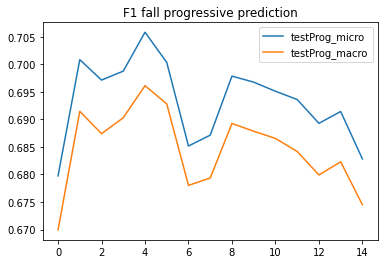

In [ ]:
%matplotlib inline
plt.plot(np.array(pp).T[0].T,label="testProg_micro")
plt.plot(np.array(pp).T[1].T,label="testProg_macro")
plt.title('F1 fall progressive prediction')
plt.legend()
plt.show()